Dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
red = pd.read_csv('/content/drive/MyDrive/IST347/Project/winequality_red.csv')

In [3]:
white = pd.read_csv('/content/drive/MyDrive/IST347/Project/winequality_white.csv')

In [4]:
red_col = red.columns.to_list()
white_col = white.columns.to_list()

## Data Understanding

In [5]:
def replace_col():
    '''
    Capitalize column names and remove space to '_', except 'pH' 
    '''
    new_red_col = []
    new_white_col = []
    for r, w in zip(red_col, white_col):

        if r =='pH' or w =='pH':
            new_r = r
            new_w = w
        else:
            new_r = r.title().replace(' ','_')
            new_w = w.title().replace(' ','_')

        new_red_col.append(new_r)
        new_white_col.append(new_w)
    red.columns = new_red_col
    white.columns = new_white_col

# replace column name
replace_col()

In [6]:
def plot_scatter(x_axis,y_axis, h=None):
    '''Plot the scatter plot by input a selected X & Y data'''
    sns.scatterplot(x = x_axis, y = y_axis, hue = h)


In [7]:
red.head()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
red.describe()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
red.loc[red.Total_Sulfur_Dioxide>250,'Total_Sulfur_Dioxide'] = red.Total_Sulfur_Dioxide.mean()  #replace outliers with mean
white.loc[(white.Quality ==3) & (white.Total_Sulfur_Dioxide>=300), 'Total_Sulfur_Dioxide'] = white.Total_Sulfur_Dioxide.mean() #replace outliers with mean

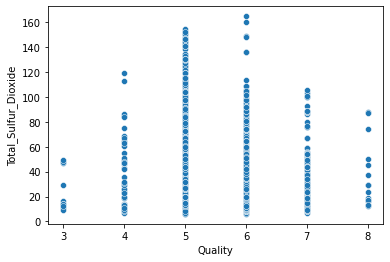

In [10]:
plot_scatter(red.Quality, red.Total_Sulfur_Dioxide)

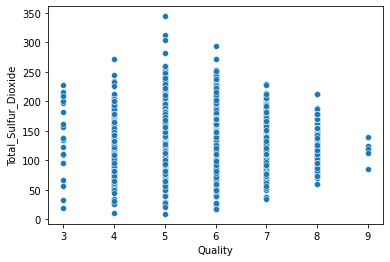

In [11]:
plot_scatter(white.Quality, white.Total_Sulfur_Dioxide)

In [12]:
# red.loc[red.Quality <= 5, 'Quality'] = 0
# red.loc[red.Quality >= 5, 'Quality'] = 1

## Algorithm Functions

In [19]:
def split_data(X,y, tsize = 0.2, rs = 101):

    '''split the data'''

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsize, random_state = rs)
    return X_train, X_test, y_train, y_test



In [52]:
def multi_regression(X_train, X_test, y_train, y_test):

    '''everything for multiregression is here, call the function and it will 
        automatically run and print out everything'''

    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f'Intercept is {lm.intercept_}')
    print()
    print(f'Cntercept is {lm.coef_}')
    print()

    y_pred = lm.predict(X_test)
    plt.scatter(y_test, y_pred)
    print_errors(y_test, y_pred)

In [53]:
def print_errors(y_test, y_pred):

    '''print all metrics by calling this function'''

    from sklearn import metrics
    print(f'Mean Absolute error is: {metrics.mean_absolute_error(y_test, y_pred)}')
    print()
    print(f'Mean Squared error is: {metrics.mean_squared_error(y_test, y_pred)}')
    print()
    print(f'Mean Squared root error is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
    print()
    print(f'R2 score is : {metrics.r2_score(y_test, y_pred)}')
    print()
    


In [82]:
def KNN(X_train, X_test, y_train, y_test):

    '''take input and run KNN'''

    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score

    #scale dataset
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    #find best K 

    best_k = 0
    accuracy = 0
    scores = []

    for k in range(1,100):
        knn_model = KNeighborsClassifier(n_neighbors = k)
        # print(knn_model)
        knn_model.fit(scaled_X_train, y_train)
        y_pred = knn_model.predict(scaled_X_test)
        score = accuracy_score(y_test, y_pred)
        # print(f'the K right now is {k}, and its score is {score}')
        scores.append(score)

        if score > accuracy:
            best_k = k
            accuracy = score

    print(f'the best K is: {best_k}, and its score is {accuracy}')

    #plot the accuracy
    plt.figure(dpi=100)
    plt.plot(range(1,100), scores, label = 'Accuracy Score')
    plt.legend()
    plt.ylabel('Score')
    plt.xlabel('k value')

    #using best_k for KNN

    best_model = KNeighborsClassifier(n_neighbors = best_k)
    best_model.fit(scaled_X_train, y_train)
    y_pred = best_model.predict(scaled_X_test)
    print_confusion_metrics(y_test, y_pred)




In [70]:
def print_confusion_metrics(y_test, y_pred):

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print()
    print('-------Confusion Metrics Report-------')
    print(f'Accuracy score of the best k is: {accuracy_score(y_test,y_pred)}')
    print()
    print(f'Confusion Metrics:')
    print(confusion_matrix(y_test, y_pred))
    print()
    print(f'Classfication Report:')
    print(classification_report(y_test, y_pred))




## Red Wine

In [49]:
# split red wine data
red_X = red.drop('Quality', axis = 1)
red_y = red.Quality
red_Xtrain,red_Xtest, red_ytrain, red_ytest = split_data(red_X,red_y, tsize=0.2, rs=42)

In [ ]:
# Multiregression
multi_regression(red_Xtrain,red_Xtest, red_ytrain, red_ytest )

the best K is: 1, and its score is 0.621875

-------Confusion Metrics Report-------
Accuracy score of the best k is: 0.621875

Confusion Metrics:
[[ 0  0  0  1  0  0]
 [ 2  1  1  6  0  0]
 [ 1  4 87 35  3  0]
 [ 0  1 31 86 13  1]
 [ 0  0  2 13 25  2]
 [ 0  0  0  2  3  0]]

Classfication Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.10      0.12        10
           5       0.72      0.67      0.69       130
           6       0.60      0.65      0.63       132
           7       0.57      0.60      0.58        42
           8       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.34      0.34      0.34       320
weighted avg       0.62      0.62      0.62       320



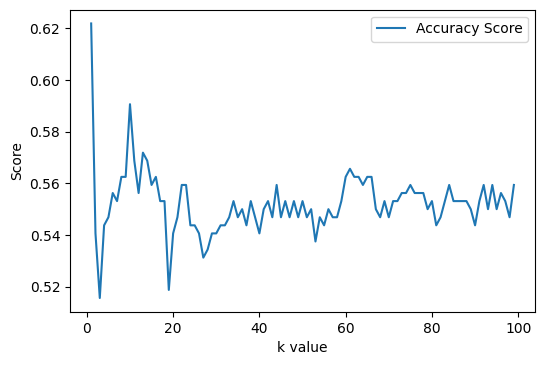

In [83]:
# KNN
KNN(red_Xtrain,red_Xtest, red_ytrain, red_ytest)

## White Wine

Intercept is 125.79843240270534

Cntercept is [ 4.61714598e-02 -1.92475861e+00 -6.30722392e-02  7.16152067e-02
 -2.97848604e-02  4.90220009e-03 -7.97073528e-05 -1.25690572e+02
  6.01232784e-01  6.45872937e-01  2.28799701e-01]

Mean Absolute error is: 0.5864252483129297

Mean Squared error is: 0.569408542880164

Mean Squared root error is: 0.7545916398159762

R2 score is : 0.2647794787576977



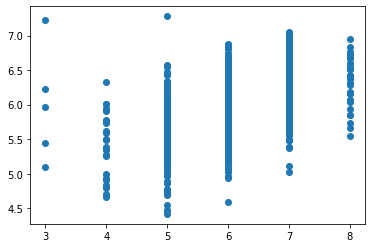

In [80]:
# Multiregression
white_X = white.drop('Quality', axis = 1)
white_y = white.Quality
white_Xtrain,white_Xtest, white_ytrain, white_ytest = split_data(white_X,white_y, rs=42)
multi_regression(white_Xtrain,white_Xtest, white_ytrain, white_ytest)

the best K is: 1, and its score is 0.6479591836734694

-------Confusion Metrics Report-------
Accuracy score of the best k is: 0.6479591836734694

Confusion Metrics:
[[  1   0   2   2   0   0]
 [  1   9   8   6   1   0]
 [  0  16 188  75  12   0]
 [  1   6  78 288  52   7]
 [  0   1   7  46 130   8]
 [  0   0   2   8   6  19]]

Classfication Report:
              precision    recall  f1-score   support

           3       0.33      0.20      0.25         5
           4       0.28      0.36      0.32        25
           5       0.66      0.65      0.65       291
           6       0.68      0.67      0.67       432
           7       0.65      0.68      0.66       192
           8       0.56      0.54      0.55        35

    accuracy                           0.65       980
   macro avg       0.53      0.52      0.52       980
weighted avg       0.65      0.65      0.65       980



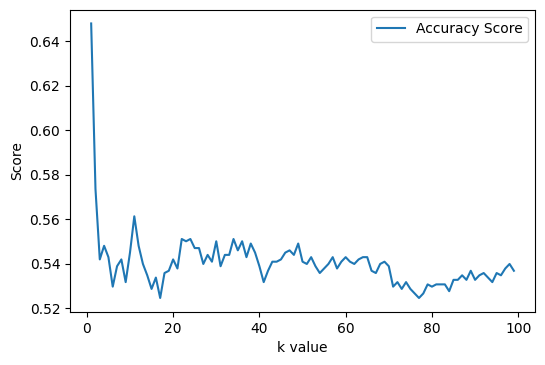

In [84]:
#KNN
KNN(white_Xtrain,white_Xtest, white_ytrain, white_ytest)